**Importing Packages**

In [1]:
%pip install seaborn
%pip install missingno
%pip install xgboost
%pip install catboost
%pip install regex
%pip install sklearn
%pip install pandas
%pip install numpy
%pip install imblearn
%pip install lightgbm
%pip install ipykernel
%pip install --upgrade nbformat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=91be6238f763193018dddbc84c36397a451dd2ea280fa6dd488b7ee47cb18c09
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built skle

In [2]:
import pandas as pd 
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as sns  
import csv 
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline   
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno
import re 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [3]:

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            #precision_score, recall_score, roc_auc_score,\
                            #plot_confusion_matrix, classification_report, plot_roc_curve, f1_score
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

Load CSV

In [4]:
diabetes = pd.read_csv('/content/diabetic_data_cleaned.csv')

Insights into the data

In [5]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
0,284318214,43985340,0.0,0,0,NaN,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,59649570,17397162,0.0,0,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0
2,67850904,6196320,0.0,1,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0
3,86008308,6970950,1.0,0,2,NaN,0,0,0,0,...,NaN,NaN,0,0,0,2,0,0,0,0
4,17130798,14532273,0.0,0,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0


**Exploring and Understanding the Data**

### Insights into our target variable

In [6]:
print(diabetes['readmitted'].value_counts())

0    54864
1    35545
2    11357
Name: readmitted, dtype: int64


In [7]:
diabetes['readmitted'] = diabetes['readmitted'].replace([0,1,2],[0,0,1])

In [8]:
print(diabetes['readmitted'] .value_counts())

0    90409
1    11357
Name: readmitted, dtype: int64


In [9]:
y = diabetes['readmitted']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 11.16 --> (11357 patient)
Percentage of patient did not have a stroke: % 88.84 --> (90409 patient)


### Visualize stroke

In [10]:
fig = px.histogram(diabetes, x="readmitted", title='Readmitted within 30 days', width=400, height=400)
fig.show()

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      99493 non-null   float64
 3   gender                    101766 non-null  int64  
 4   age                       101766 non-null  int64  
 5   weight                    3197 non-null    float64
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                61510 non-null   float64
 11  medical_specialty         51817 non-null   float64
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  i

### Check for Missing Data / Missing Values

In [12]:

def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(diabetes)

,Missing_Number,Missing_Percent
weight,98569,0.968585
medical_specialty,49949,0.490822
payer_code,40256,0.395574
race,2273,0.022336
diag_3,1423,0.013983
diag_2,358,0.003518
diag_1,21,0.000206
encounter_id,0,0.000000
number_inpatient,0,0.000000
diabetesMed,0,0.000000


<Axes: >

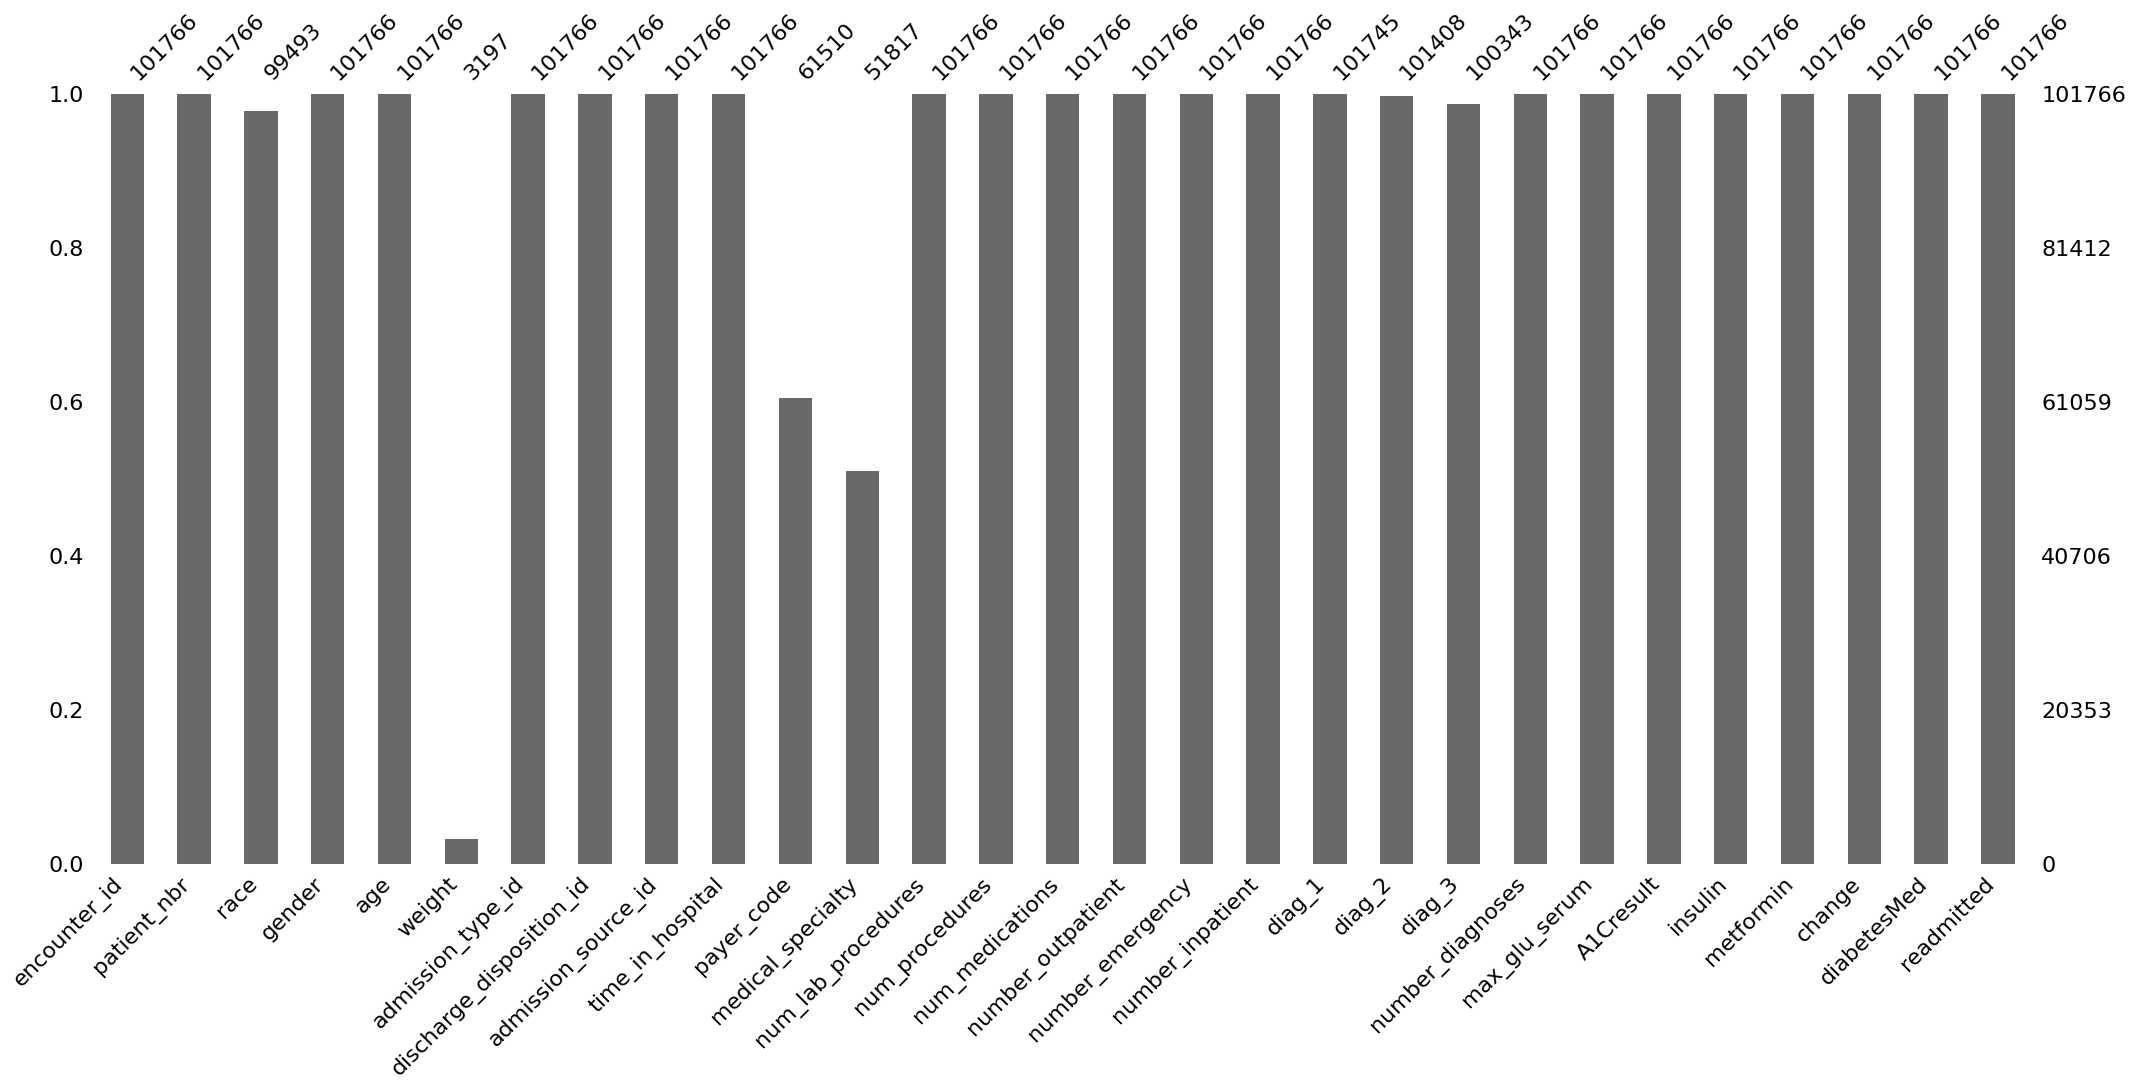

In [13]:
# Visualizing the missing data to get more idea
msno.bar(diabetes)

<Axes: >

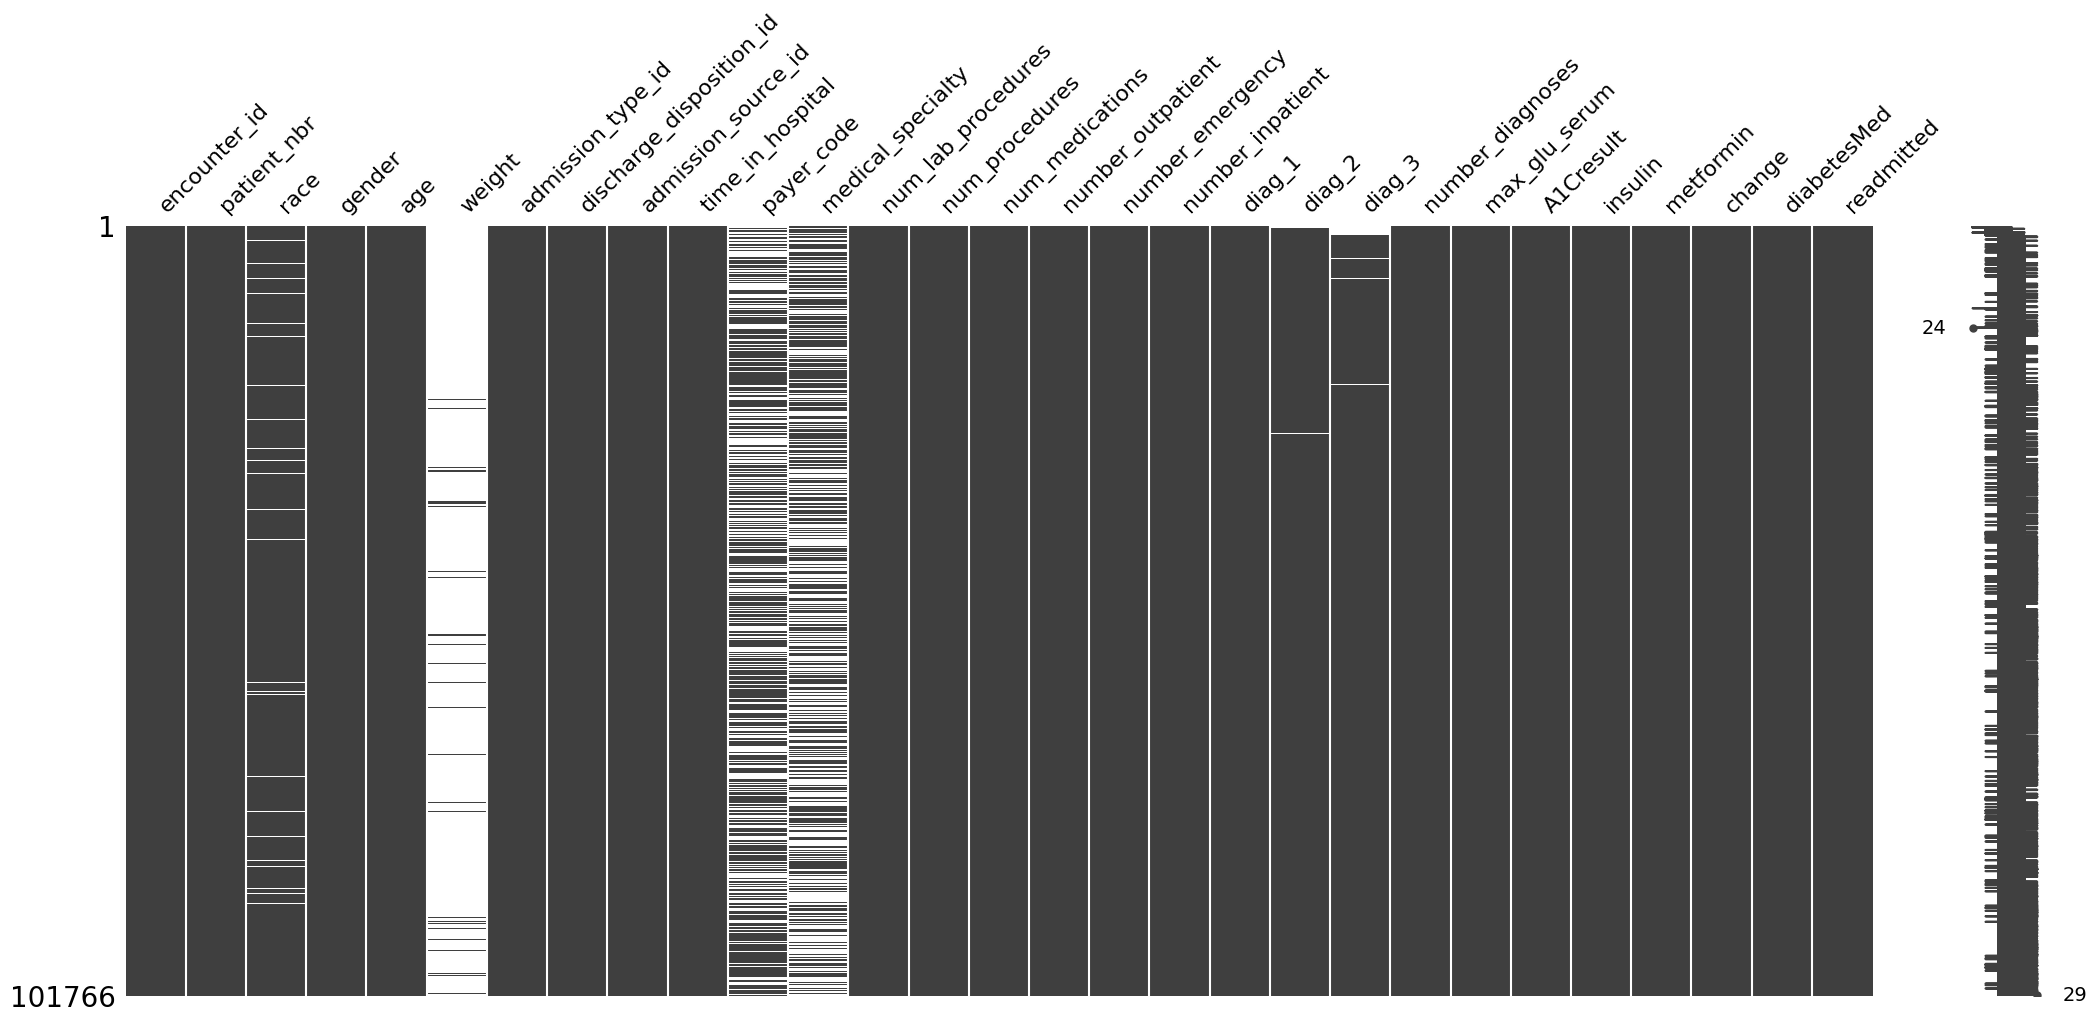

In [14]:
msno.matrix(diabetes)


# Numerical Features
* Look at the data elements (columns) using `diabetes.head()`
* Look at the Dtype (data type) using `diabetes.info()`

In [15]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
0,284318214,43985340,0.0,0,0,NaN,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,59649570,17397162,0.0,0,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0
2,67850904,6196320,0.0,1,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0
3,86008308,6970950,1.0,0,2,NaN,0,0,0,0,...,NaN,NaN,0,0,0,2,0,0,0,0
4,17130798,14532273,0.0,0,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0


In [16]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      99493 non-null   float64
 3   gender                    101766 non-null  int64  
 4   age                       101766 non-null  int64  
 5   weight                    3197 non-null    float64
 6   admission_type_id         101766 non-null  int64  
 7   discharge_disposition_id  101766 non-null  int64  
 8   admission_source_id       101766 non-null  int64  
 9   time_in_hospital          101766 non-null  int64  
 10  payer_code                61510 non-null   float64
 11  medical_specialty         51817 non-null   float64
 12  num_lab_procedures        101766 non-null  int64  
 13  num_procedures            101766 non-null  i

In [17]:
diabetes['race'].info()
diabetes['race'].astype('float64')

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: race
Non-Null Count  Dtype  
--------------  -----  
99493 non-null  float64
dtypes: float64(1)
memory usage: 795.2 KB


0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
         ... 
101761    0.0
101762    0.0
101763    0.0
101764    NaN
101765    0.0
Name: race, Length: 101766, dtype: float64

In [18]:
diabetes['weight'].info()
diabetes['weight'].astype('float64')

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
3197 non-null   float64
dtypes: float64(1)
memory usage: 795.2 KB


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
101761   NaN
101762   NaN
101763   NaN
101764   NaN
101765   NaN
Name: weight, Length: 101766, dtype: float64

# Skewness

In [19]:
diabetes.skew()

encounter_id                 0.699142
patient_nbr                  0.471281
race                         3.047696
gender                      -0.150298
age                         -0.601494
weight                      -0.300511
admission_type_id            1.193724
discharge_disposition_id     1.373311
admission_source_id          3.496705
time_in_hospital             1.279599
payer_code                   0.955927
medical_specialty            1.869624
num_lab_procedures           0.346238
num_procedures               1.215179
num_medications              0.992363
number_outpatient           16.018163
number_emergency            35.774946
number_inpatient             4.325732
diag_1                       1.749509
diag_2                       1.638719
diag_3                       1.557565
number_diagnoses            -0.550013
max_glu_serum                4.707242
A1Cresult                    2.590818
insulin                     -0.258907
metformin                   -0.380846
change      

### Univariate Analysis

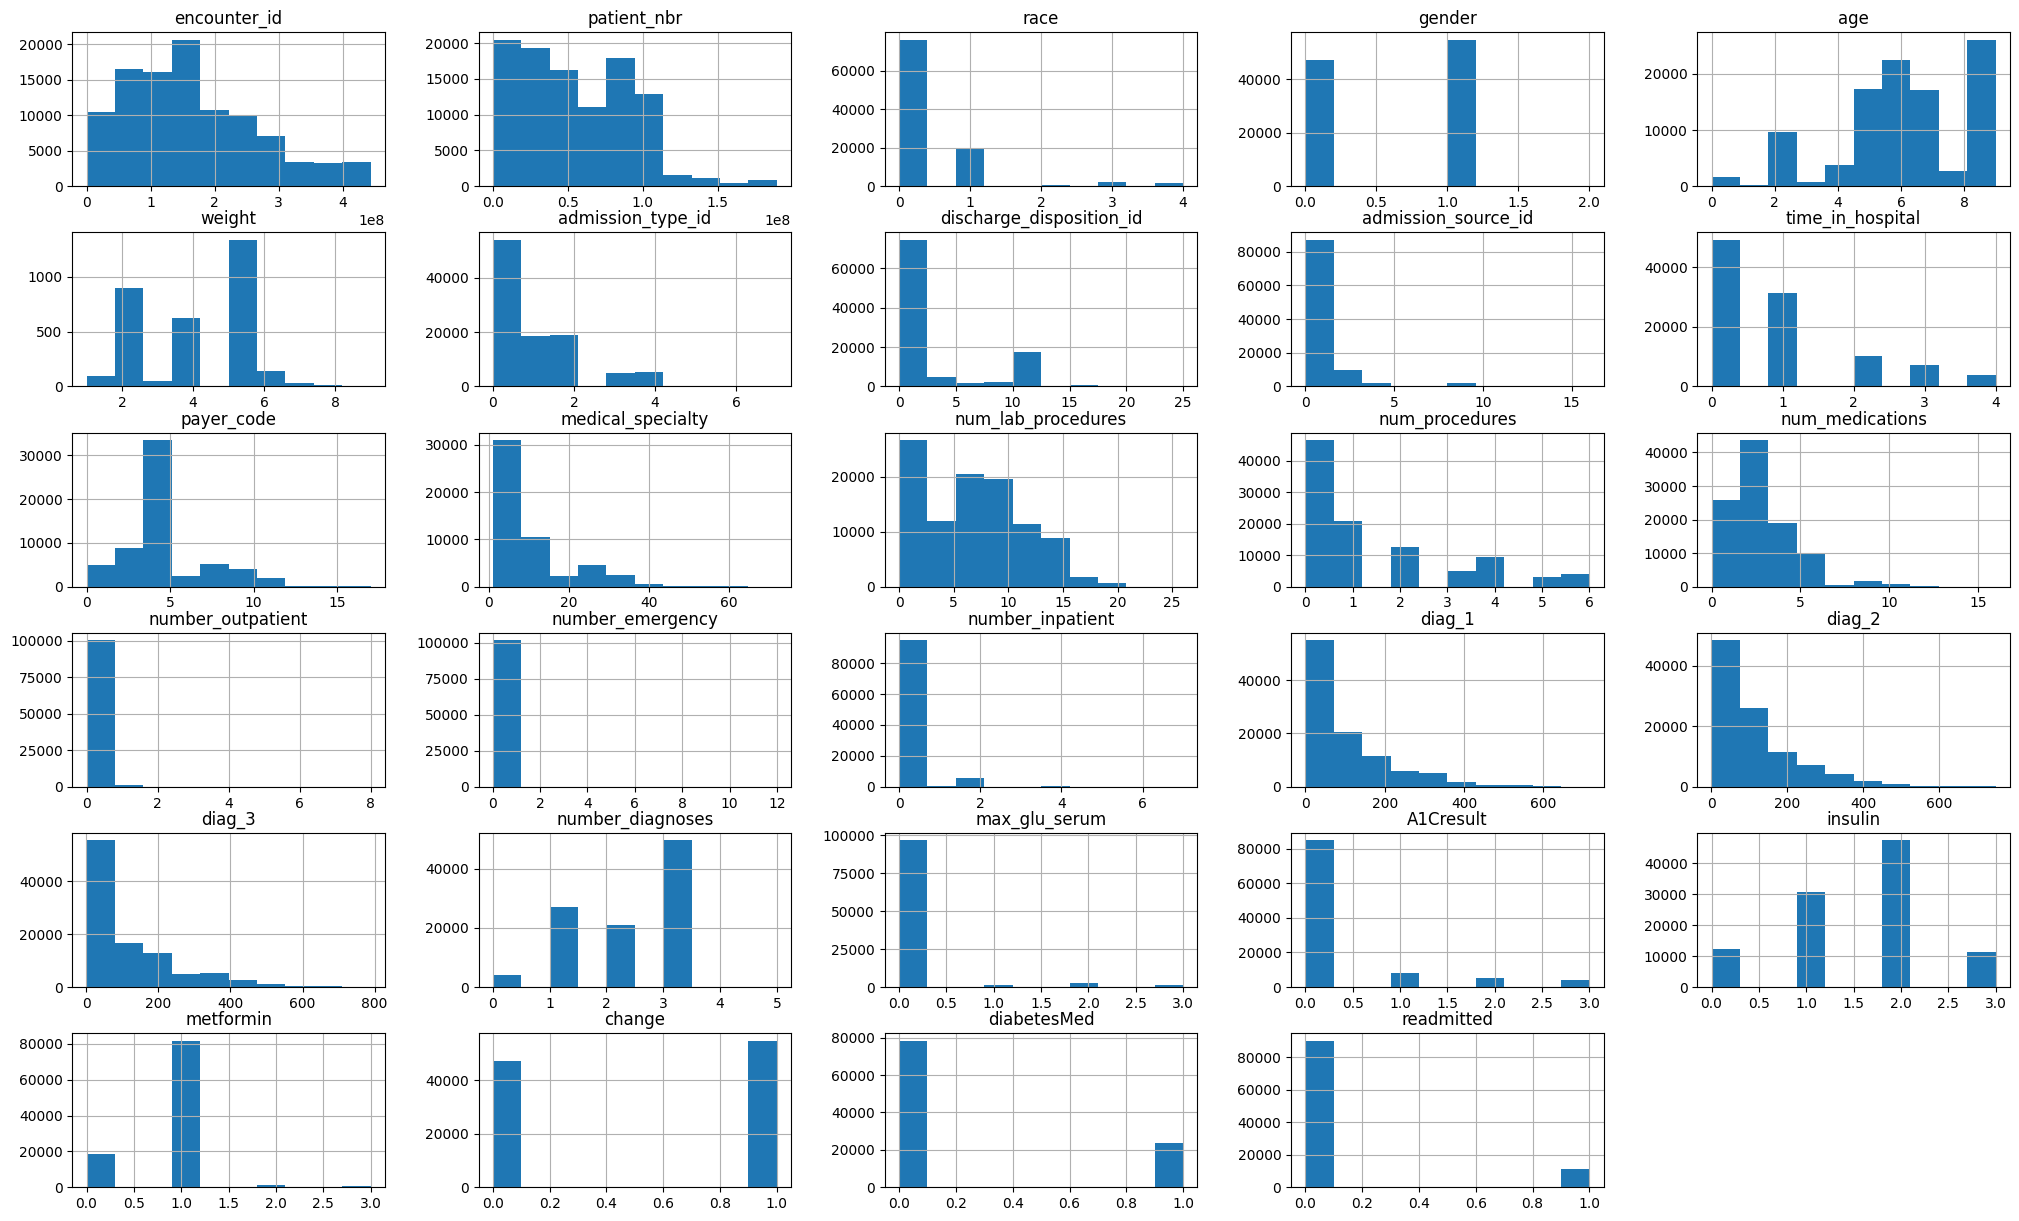

In [20]:
diabetes.hist(figsize=(25,15));

# Catergoriacal Analysis

In [21]:
print (f'{round(diabetes["race"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="race", title='Race', width=500, height=500)
fig.show()

0.0    76.49
1.0    19.31
3.0     2.05
4.0     1.51
2.0     0.64
Name: race, dtype: float64


In [22]:
print (f'{round(diabetes["weight"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(diabetes, x="weight", title='Weight', width=500, height=500)
fig.show()

5.0    41.79
2.0    28.06
4.0    19.55
6.0     4.54
1.0     3.03
3.0     1.50
7.0     1.09
8.0     0.34
9.0     0.09
Name: weight, dtype: float64


In [23]:
fig = px.histogram(diabetes, x="readmitted", color="race",width=600, height=400)
fig.show()

In [24]:
fig = px.histogram(diabetes, x="readmitted", color="weight",width=600, height=400)
fig.show()

In [25]:
fig = px.histogram(diabetes, x="readmitted", y="weight", color="race",width=600, height=400)
fig.show()

#Bivariate Analysis

In [26]:
print (f'A black person has a probability of {round(diabetes[diabetes["race"]==1]["readmitted"].mean()*100,2)} % to have to be readmitted')
print (f'A white person has a probability of {round(diabetes[diabetes["race"]==0]["readmitted"].mean()*100,2)} % to have to be readmitted')
print (f'An asian person has a probability of {round(diabetes[diabetes["race"]==2]["readmitted"].mean()*100,2)} % to have to be readmitted')
print (f'A hispanic person has a probability of {round(diabetes[diabetes["race"]==3]["readmitted"].mean()*100,2)} % to have to be readmitted')
print (f'An other person has a probability of {round(diabetes[diabetes["race"]==4]["readmitted"].mean()*100,2)} % to have to be readmitted')


A black person has a probability of 11.22 % to have to be readmitted
A white person has a probability of 11.29 % to have to be readmitted
An asian person has a probability of 10.14 % to have to be readmitted
A hispanic person has a probability of 10.41 % to have to be readmitted
An other person has a probability of 9.63 % to have to be readmitted


# Correlation Matrix & Scatter Plots

In [27]:
diabetes.corr()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
encounter_id,1.000000,0.512028,-0.011299,-0.005974,0.037587,0.043929,-0.145579,0.039627,-0.194206,-0.061619,...,0.067545,0.034621,0.272009,-0.158636,0.034317,-0.002038,-0.038117,-0.096372,-0.051817,-0.008519
patient_nbr,0.512028,1.000000,-0.006351,-0.006577,0.039920,0.011765,-0.008466,0.036419,-0.140125,-0.025524,...,0.038367,0.035087,0.224676,-0.099987,0.017919,0.008971,-0.018701,-0.054842,-0.017232,0.007893
race,-0.011299,-0.006351,1.000000,0.029427,-0.118554,-0.026392,-0.033087,-0.060464,-0.018972,-0.004130,...,-0.014529,-0.011441,-0.079784,-0.022571,0.024284,-0.011013,0.000197,-0.011775,-0.006137,-0.007020
gender,-0.005974,-0.006577,0.029427,1.000000,0.024596,-0.174496,-0.016703,0.063041,0.003070,0.024123,...,-0.019144,-0.013417,0.002076,0.001737,-0.014588,-0.003379,-0.001559,0.014832,0.015945,0.002877
age,0.037587,0.039920,-0.118554,0.024596,1.000000,-0.021752,0.009563,0.223630,0.022628,0.081401,...,0.030370,0.020799,0.177048,0.035523,-0.049196,0.029977,0.021755,0.028424,0.006835,0.013637
weight,0.043929,0.011765,-0.026392,-0.174496,-0.021752,1.000000,0.012260,-0.123650,-0.107832,-0.024736,...,-0.013364,-0.041151,0.028569,NaN,0.020845,0.003272,-0.070466,-0.051900,-0.046316,-0.009224
admission_type_id,-0.145579,-0.008466,-0.033087,-0.016703,0.009563,0.012260,1.000000,-0.019123,0.270547,-0.004609,...,0.015895,-0.014320,-0.135871,0.345985,-0.058895,0.035863,-0.013167,-0.009434,-0.000346,-0.012530
discharge_disposition_id,0.039627,0.036419,-0.060464,0.063041,0.223630,-0.123650,-0.019123,1.000000,0.043374,0.216639,...,0.050399,0.088764,0.176298,0.080594,-0.028826,0.006505,0.041139,-0.020550,0.004470,0.059374
admission_source_id,-0.194206,-0.140125,-0.018972,0.003070,0.022628,-0.107832,0.270547,0.043374,1.000000,0.046007,...,0.028532,0.011439,-0.084294,0.113064,-0.053776,-0.007663,0.015977,0.033550,0.007166,-0.011453
time_in_hospital,-0.061619,-0.025524,-0.004130,0.024123,0.081401,-0.024736,-0.004609,0.216639,0.046007,1.000000,...,0.107041,0.140388,0.202012,0.004234,0.058055,-0.005576,0.031252,-0.099651,-0.053862,0.041020


In [28]:
diabetes.groupby('race').mean()

,encounter_id,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,
0.0,1.688394e+08,5.661856e+07,0.521544,6.432673,3.893361,0.978804,2.970696,0.796003,0.863940,4.300286,...,109.844157,114.663331,2.199608,0.122236,0.284340,1.579758,0.839564,0.538614,0.231922,0.112906
1.0,1.451321e+08,4.334391e+07,0.610515,5.593389,3.973451,0.656221,2.306195,0.811661,0.907496,5.113287,...,102.183646,110.955864,1.995888,0.047683,0.298490,1.518011,0.853201,0.545914,0.229672,0.112181
2.0,2.041567e+08,7.402927e+07,0.496100,6.372855,2.333333,1.071763,2.185647,0.486739,0.742590,4.406915,...,122.340125,108.913600,1.978159,0.078003,0.380655,1.670827,0.848674,0.564743,0.258970,0.101404
3.0,1.748444e+08,6.154605e+07,0.536082,5.401571,NaN,1.143348,1.810997,0.565538,0.750123,5.104406,...,104.611852,107.018612,1.893962,0.185567,0.400098,1.595484,0.814924,0.514482,0.238586,0.104075
4.0,1.961646e+08,7.614521e+07,0.498008,5.903718,3.600000,1.029216,2.310757,0.675963,0.838645,4.662679,...,108.811170,112.205526,2.023240,0.097610,0.351926,1.568393,0.831341,0.462815,0.191235,0.096282


In [29]:
diabetes.groupby('weight').mean()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
weight,,,,,,,,,,,,,,,,,,,,,
1.0,1.439635e+08,6.693240e+07,0.086022,0.731959,6.154639,1.278351,3.793814,1.659794,1.123711,4.606061,...,124.537634,124.827957,2.412371,0.0,0.247423,1.721649,0.855670,0.701031,0.371134,0.082474
2.0,1.510094e+08,7.080590e+07,0.103368,0.663322,6.557414,1.121516,3.328874,1.771460,1.066890,4.525741,...,137.581839,147.702032,2.441472,0.0,0.153846,1.764771,0.890747,0.703456,0.334448,0.117057
3.0,8.394299e+07,7.290075e+07,0.212766,0.458333,5.854167,3.208333,1.333333,2.000000,0.854167,4.818182,...,121.133333,112.244444,1.895833,0.0,0.145833,1.458333,0.729167,0.562500,0.208333,0.166667
4.0,1.720992e+08,7.281661e+07,0.058725,0.387200,6.129600,1.150400,1.716800,0.940800,0.860800,4.768916,...,128.854400,123.876404,2.438400,0.0,0.244800,1.764800,0.804800,0.643200,0.315200,0.107200
5.0,1.520341e+08,7.094639e+07,0.072713,0.473802,6.750000,1.309132,2.241018,1.333832,0.990269,4.598532,...,131.638473,132.721471,2.437874,0.0,0.166916,1.768713,0.821856,0.663922,0.305389,0.114521
6.0,1.741234e+08,7.117317e+07,0.095588,0.413793,5.337931,1.020690,1.662069,1.006897,1.034483,5.000000,...,138.834483,126.034483,2.600000,0.0,0.337931,1.668966,0.806897,0.641379,0.234483,0.082759
7.0,1.893894e+08,7.252807e+07,0.029412,0.514286,5.285714,1.000000,2.514286,1.028571,1.057143,5.233333,...,126.914286,118.114286,2.685714,0.0,0.200000,1.857143,0.771429,0.514286,0.285714,0.085714
8.0,1.799768e+08,8.095389e+07,0.100000,0.454545,4.363636,0.636364,0.909091,0.363636,1.090909,4.300000,...,102.000000,81.909091,2.545455,0.0,0.181818,1.727273,0.454545,0.272727,0.090909,0.090909
9.0,1.895787e+08,4.654505e+07,0.333333,0.666667,5.333333,1.333333,3.666667,0.666667,2.000000,6.500000,...,87.333333,209.666667,2.333333,0.0,0.000000,1.666667,0.666667,0.666667,0.000000,0.000000


In [30]:
diabetes[['age','weight','race','readmitted']].corr()

,age,weight,race,readmitted
age,1.000000,-0.021752,-0.118554,0.013637
weight,-0.021752,1.000000,-0.026392,-0.009224
race,-0.118554,-0.026392,1.000000,-0.007020
readmitted,0.013637,-0.009224,-0.007020,1.000000


In [31]:
diabetes.groupby('readmitted').mean()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
0,1.655115e+08,5.422214e+07,0.329763,0.537137,6.231072,3.897535,0.924399,2.706357,0.814864,0.852161,...,106.556481,108.160047,112.047262,2.126746,0.106040,0.295413,1.572941,0.838810,0.541495,0.234014
1,1.627347e+08,5.519219e+07,0.313457,0.541692,6.328432,3.854342,0.876904,3.534384,0.760324,0.993484,...,114.099806,110.540519,126.777206,2.267148,0.116756,0.257462,1.528132,0.862992,0.510610,0.197763


# Clean the Data (Future Engineering)

Step 1: Drop the columns that are either missing most of the times or are not relevant

In [32]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,metformin,change,diabetesMed,readmitted
0,284318214,43985340,0.0,0,0,NaN,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,59649570,17397162,0.0,0,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0
2,67850904,6196320,0.0,1,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0
3,86008308,6970950,1.0,0,2,NaN,0,0,0,0,...,NaN,NaN,0,0,0,2,0,0,0,0
4,17130798,14532273,0.0,0,1,NaN,0,0,0,0,...,NaN,NaN,0,0,1,1,1,1,0,0


In [33]:
diabetes.drop(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
           'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 
           'num_medications', 'time_in_hospital', 'number_outpatient', 'diag_1', 'diag_2', 'diag_3', 'number_emergency', 'number_inpatient', 
           'number_diagnoses', 'metformin', 'change'], axis = 1, inplace = True)

In [34]:
diabetes.head()

,admission_type_id,discharge_disposition_id,admission_source_id,max_glu_serum,A1Cresult,insulin,diabetesMed,readmitted
0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,0,0,0,0,0,2,0,0
4,0,0,0,0,1,1,0,0


Step 2: Check for duplicates or "dups"

In [35]:
diabetes.duplicated().sum()

97401

Step 3: Check for missing data

In [36]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   admission_type_id         101766 non-null  int64
 1   discharge_disposition_id  101766 non-null  int64
 2   admission_source_id       101766 non-null  int64
 3   max_glu_serum             101766 non-null  int64
 4   A1Cresult                 101766 non-null  int64
 5   insulin                   101766 non-null  int64
 6   diabetesMed               101766 non-null  int64
 7   readmitted                101766 non-null  int64
dtypes: int64(8)
memory usage: 6.2 MB


<Axes: >

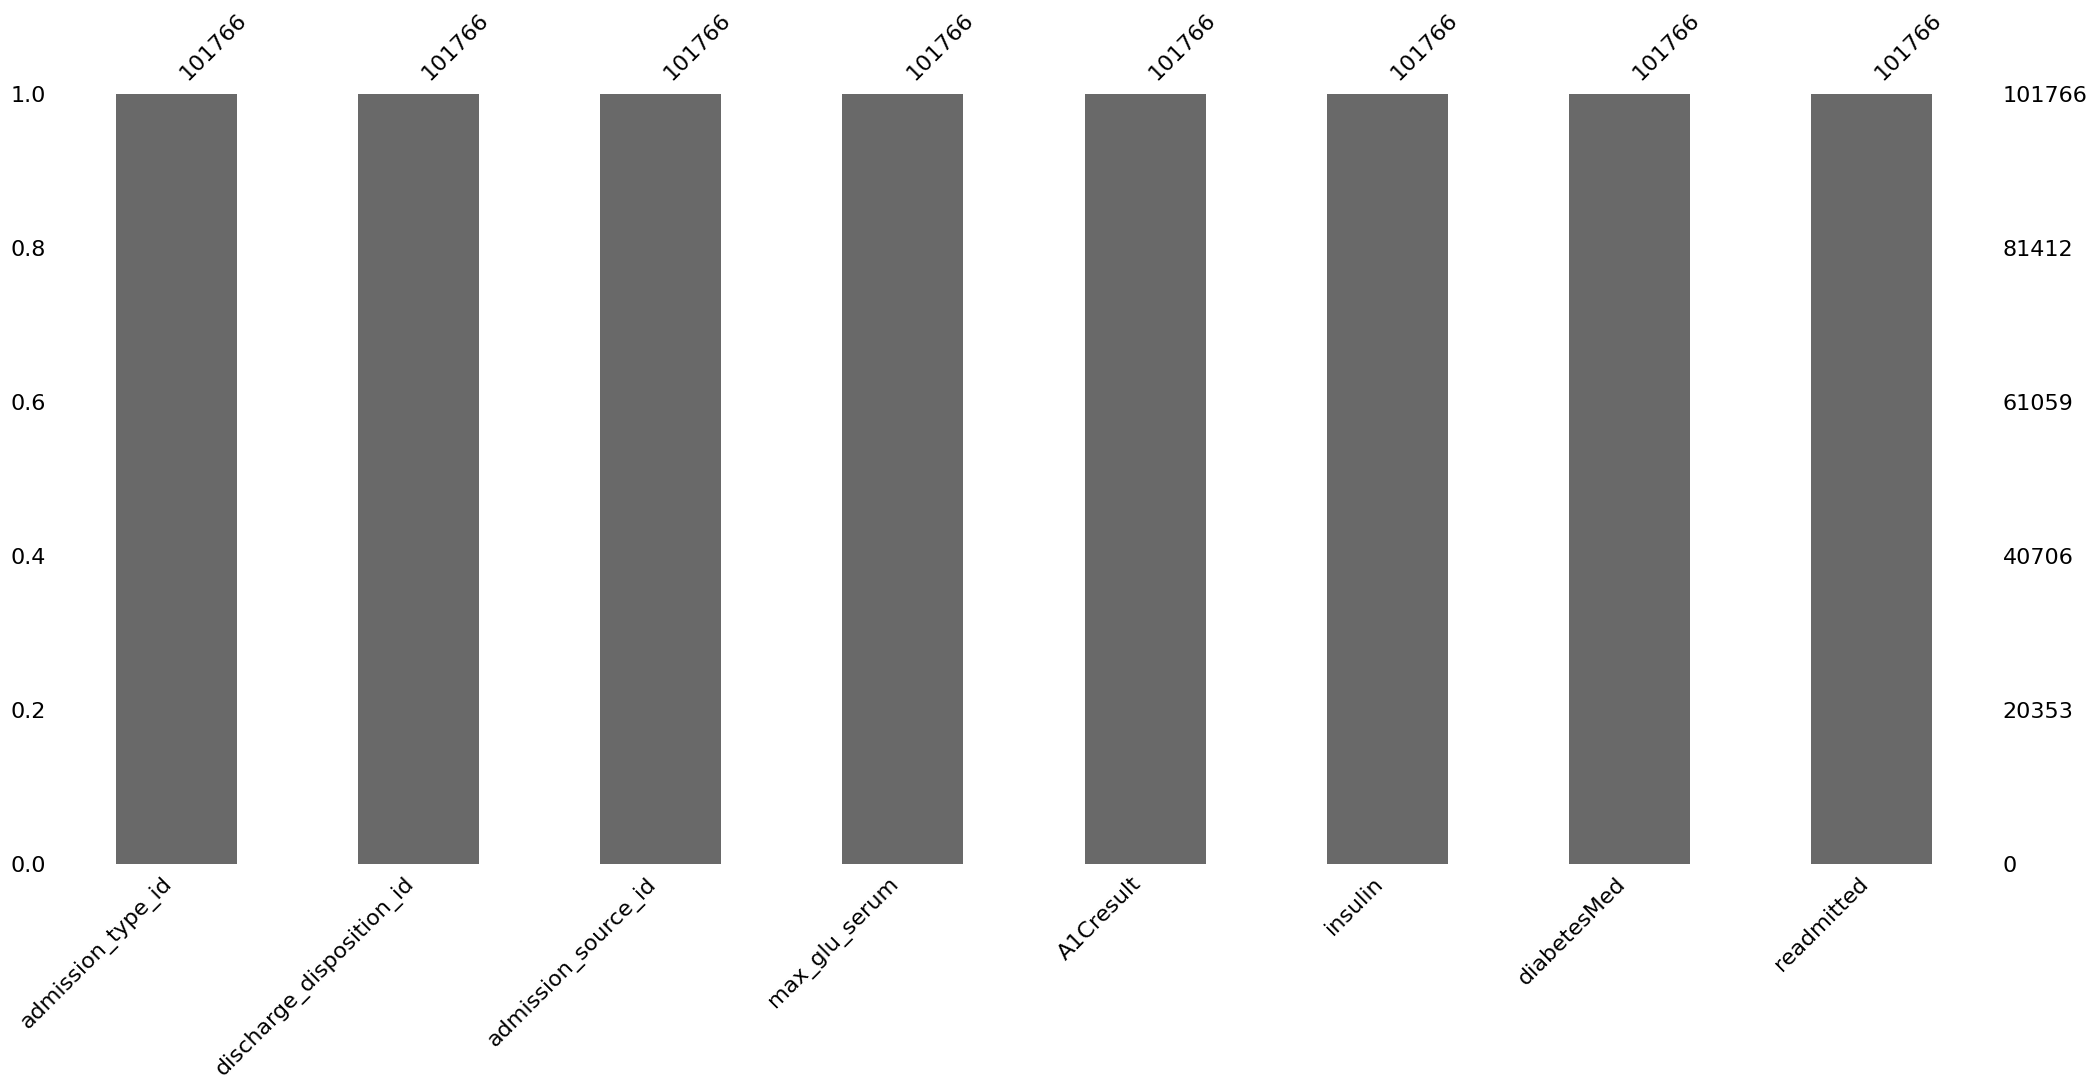

In [37]:
# Visualizing the missing data
msno.bar(diabetes)

# Breaking the data up into Train & Test

In [38]:
train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [39]:
diabetes.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [40]:
train_df.readmitted.value_counts()

0    63325
1     7911
Name: readmitted, dtype: int64

In [41]:
valid_df.readmitted.value_counts()

0    13529
1     1736
Name: readmitted, dtype: int64

In [42]:
test_df.readmitted.value_counts()

0    13555
1     1710
Name: readmitted, dtype: int64

# Treating the Imbalance in the Data

In [43]:
def calc_prevalence(y_actual):    
    return (sum(y_actual)/len(y_actual))

In [44]:
rows_pos = train_df.readmitted == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

diabetes_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

diabetes_df_balanced = diabetes_df_balanced.sample(n = len(diabetes_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced), \
                                                calc_prevalence(diabetes_df_balanced.readmitted.values)))

Train balanced prevalence(n = 15822):0.500


In [45]:
diabetes_df_balanced.readmitted.value_counts()

0    7911
1    7911
Name: readmitted, dtype: int64

In [46]:
X_train = diabetes_df_balanced.drop('readmitted',axis=1)

y_train = diabetes_df_balanced['readmitted']

X_valid = valid_df.drop('readmitted',axis=1)

y_valid = valid_df['readmitted']

X_test = test_df.drop('readmitted',axis=1)

y_test = test_df['readmitted']

In [47]:
X_train.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed'],
      dtype='object')

In [48]:
X_valid.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed'],
      dtype='object')

In [49]:
X_test.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed'],
      dtype='object')

In [55]:
from matplotlib.transforms import Transform
scaler=StandardScaler()
X_train[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed']] = pd.DataFrame(scaler.fit_transform(X_train[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed']]), columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed'])

X_valid[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed']] = pd.DataFrame(scaler.transform(X_valid[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed']]), columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed'])

X_test[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed']] = pd.DataFrame(scaler.transform(X_test[['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed']]), columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'max_glu_serum', 'A1Cresult', 'insulin', 'diabetesMed'])

# Creating and Understanding Models

In [56]:
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh = 0.5):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

## Linear Regression

In [57]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)


y_valid_preds = lnr.predict(X_valid)

In [58]:
y_valid_preds

array([0.91502725, 0.49476833, 0.44164091, ..., 0.46807968, 0.4770707 ,
       0.9733518 ])

## Logistic Regression

In [59]:
lr=LogisticRegression(random_state = 42, solver = 'newton-cg', max_iter = 200)
lr.fit(X_train, y_train)

y_valid_preds = lr.predict_proba(X_valid)[:,1]

print('Metrics for Validation data:')

lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, 0.5)

Metrics for Validation data:
AUC:0.565
accuracy:0.583
recall:0.520
precision:0.140
specificity:0.591
prevalence:0.114
 
